<a href="https://colab.research.google.com/github/vgrangep/notebooks/blob/main/Comparing_Visualization_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

names = iris['target_names']
iris_df['species names'] = names[iris_df['species']]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Displays


## Native Panda Plot

In [ ]:
f1 = 'sepal length (cm)'
f2 = 'sepal width (cm)'

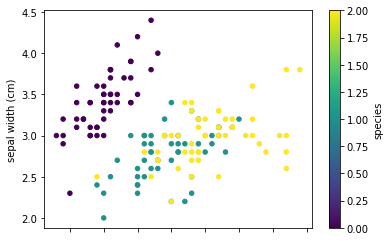

In [ ]:
ax1 = iris_df.plot.scatter(x=f1,
                      y=f2,
                      c='species',
                      colormap='viridis')

## Matplotlib

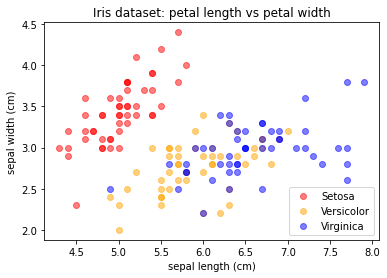

In [ ]:
import matplotlib.pyplot as plt

colours = ['red', 'orange', 'blue']
species = ['Setosa', 'Versicolor', 'Virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df[f1],        
        species_df[f2],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel(f1)
plt.ylabel(f2)
plt.title('Iris dataset: petal length vs petal width')
plt.legend(loc='lower right')

plt.show()


## Seaborn

In [ ]:
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


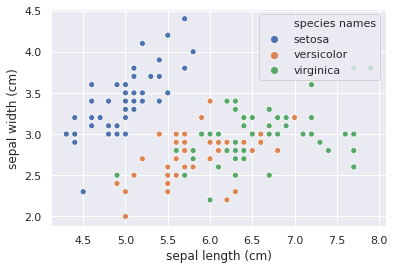

In [ ]:
ax = sns.scatterplot(x=f1, y=f2, hue="species names", data=iris_df)

## Plotly

A bit more work, but allows for interractive graphs

In [ ]:
pip install plotly --upgrade

     |████████████████████████████████| 11.5MB 2.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly as pl
import plotly.graph_objs as go



Reminder: [plotly marker style](https://plot.ly/python/marker-style/)

In [ ]:
colours = ['red', 'orange', 'blue']
species = ['Setosa', 'Versicolor', 'Virginica']

data = []

for i in range(0, 3): 
  species_df = iris_df[iris_df['species'] == i]    

  trace = go.Scatter(
    x = species_df[f1],
    y = species_df[f2],
    name = species[i],
    mode = 'markers',
    marker = dict(
      size = 10,
      color = colours[i],
      line = dict(
        width = 2,
        color = 'rgb(0, 0, 0)'
      )
    )
  )
  data.append(trace) 
  
layout = go.Layout(
    title = 'Iris Scatter',
    yaxis = dict(zeroline = False),
    xaxis = dict(zeroline = False),    
    autosize=False,
    width=800,
    height=600,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

markers=dict(size=8,
            line=dict(width=0.5)
           )

fig = go.Figure(data=data, layout=layout)
fig.update_traces(marker=markers,
                  selector=dict(mode='markers'))
fig.show()
    

## Plotly Express

In [ ]:
import plotly.express as px

In [ ]:
fig3 = px.scatter(iris_df, x=f1, y=f2, color="species names")

fig3.show()

# Correlation tools

article: [here](https://medium.com/@harimittapalli/exploratory-data-analysis-iris-dataset-9920ea439a3e)

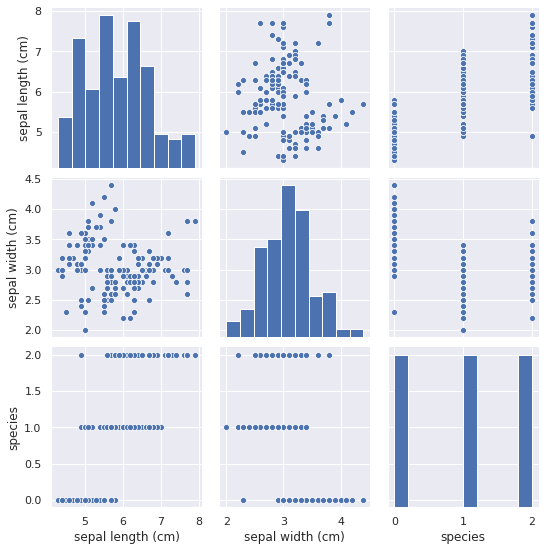

In [ ]:
#iris_df.ix[:,["petal length (cm)","petal width (cm)","species"]]

sns.pairplot(iris_df.loc[:,[f1,f2,"species"]])

[]

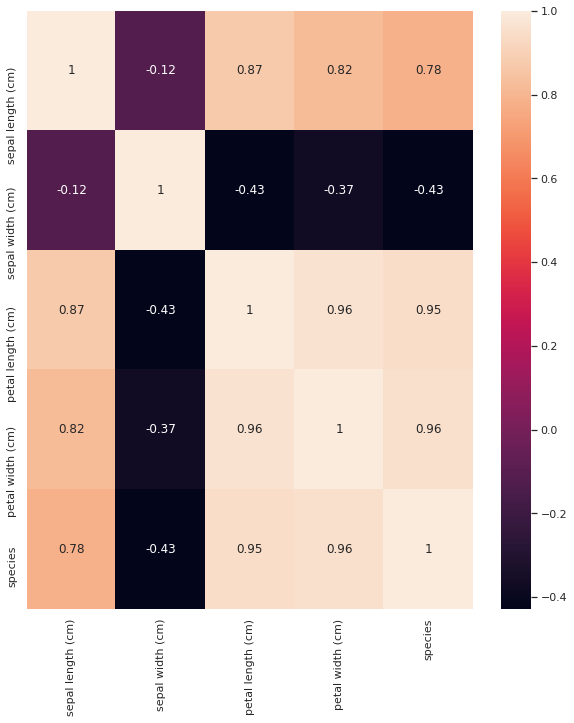

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_df.corr(),annot=True)
plt.plot()